<a href="https://colab.research.google.com/github/oramalholucas/etl_python/blob/main/ETL_csv_%3E_Google_Big_Query.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETL Com Python

Projeto de ETL (Extract Transform and Load) de dados, utilizando linguagem Python.
 - Extração de dados no formato.csv.
 - Limpeza, transformação e henriquecimento desses dados.
 - Carregamento desses dados em uma instância do Google Big Query.

Dados Fonte: https://dados.gov.br/dados/conjuntos-dados/dados-abertos-de-contratos-administrativos

# Bibliotecas Utilizadas

In [ ]:
import pandas as pd
from IPython.display import Image
from google.oauth2 import service_account

# Extração dos Dados

In [ ]:
df_contratos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/contratos-2020/tabela_contratos.csv')

In [ ]:
display(df_contratos)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5
...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,208,243,65
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,209,244,17
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,212,246,66
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,213,247,67


In [ ]:
df_empresas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/contratos-2020/tabela_empresas.csv')

In [ ]:
display(df_empresas)

,id_empresa,nome_empresa
0,1,Thomas Jefferson
1,2,Chaveiro City
2,3,HBL Carimbos
3,4,Claro S/A
4,5,Imprensa Nacional
...,...,...
63,64,Nara Comercial
64,65,SESI-DF
65,66,FORMA
66,67,IG Elevadores


In [ ]:
df_datas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/contratos-2020/tabela_datas.csv')

In [ ]:
display(df_datas)

,id_data,data
0,1,20/05/2014
1,2,27/09/2014
2,3,28/11/2014
3,4,20/12/2014
4,5,28/12/2014
...,...,...
249,250,24/10/2019
250,251,24/10/2020
251,252,05/11/2020
252,253,23/01/2020


# Limpeza, Transformação e Henriquecimento de Dados

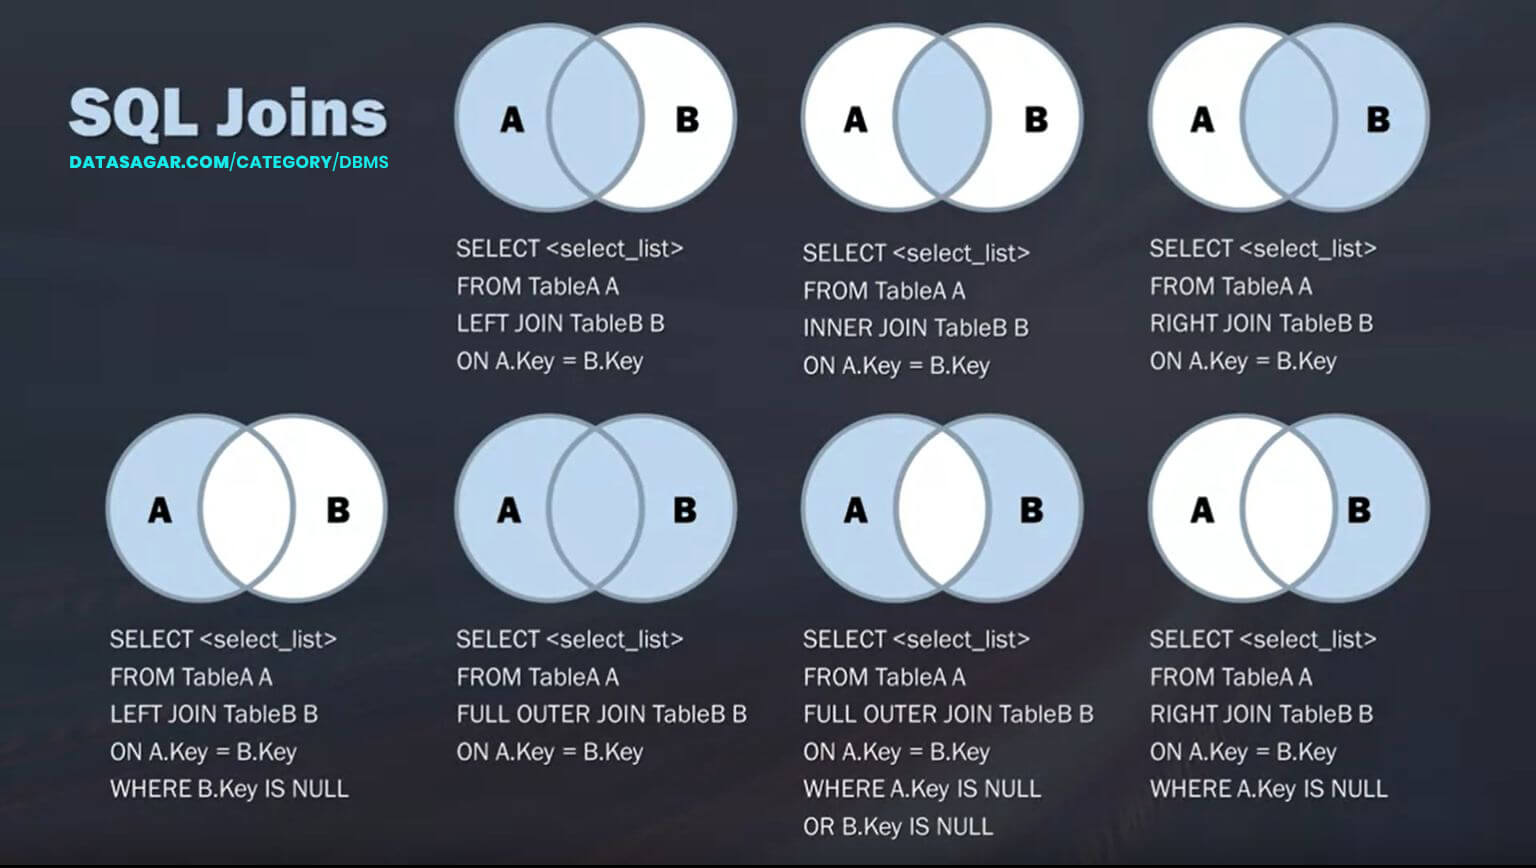

In [ ]:
Image('https://datasagar.com/illionso_awesome/2023/02/joinsinsql_.jpg')

In [ ]:
# Fazendo join com df_empresas
contratos_joined = df_contratos.merge(df_empresas,
                                   left_on='fk_empresa_contratada',
                                   right_on='id_empresa',
                                   how='left')

In [ ]:
display(contratos_joined)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada,id_empresa,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1,1,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2,2,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3,3,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4,4,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5,5,Imprensa Nacional
...,...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,208,243,65,65,SESI-DF
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,209,244,17,17,Central IT
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,212,246,66,66,FORMA
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,213,247,67,67,IG Elevadores


In [ ]:
# Excluíndo as colunas que contém o id_empresa
contratos_joined.drop(columns=['id_empresa', 'fk_empresa_contratada'], inplace=True)

In [ ]:
# Exibindo as 5 primeiras linhas do dataframe
contratos_joined.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional


In [ ]:
# Fazendo join com df_datas para pegar a data de inicio da vigência do contrato
contratos_joined_2 = contratos_joined.merge(df_datas,
                                   left_on='inicio_vigencia',
                                   right_on='id_data',
                                   how='left')

In [ ]:
# Exibindo as 5 primeiras linhas do dataframe
contratos_joined_2.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa,id_data,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson,4,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City,13,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos,10,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A,6,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional,8,27/01/2015


In [ ]:
# Excluíndo as colunas que contém o id_data
contratos_joined_2.drop(columns=['inicio_vigencia', 'id_data'], inplace=True)

In [ ]:
# Renomeando coluna de data
contratos_joined_2.rename(columns={'data': 'data_inicio_vigencia'}, inplace=True)

In [ ]:
# Exibindo as 5 primeiras linhas do dataframe
contratos_joined_2.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,data_inicio_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015


In [ ]:
# Fazendo 2º join com df_datas para pegar a data de término da vigência do contrato
contratos_joined_3 = contratos_joined_2.merge(df_datas,
                                   left_on='termino_vigencia',
                                   right_on='id_data',
                                   how='left')

In [ ]:
# Excluíndo as colunas que contém o id_data
contratos_joined_3.drop(columns=['termino_vigencia', 'id_data'], inplace=True)

In [ ]:
# Renomeando coluna de data
contratos_joined_3.rename(columns={'data': 'data_termino_vigencia'}, inplace=True)

In [ ]:
# Exibindo as 5 primeiras linhas do dataframe
contratos_joined_3.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,20/12/2014,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,26/02/2015,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,10/02/2015,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,01/01/2015,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,27/01/2015,26/01/2016


In [ ]:
# Modificando o nome do dataframe
contratos_final = contratos_joined_3
display(contratos_final)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,20/12/2014,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,26/02/2015,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,10/02/2015,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,01/01/2015,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,27/01/2015,26/01/2016
...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,24/07/2020,24/07/2021
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,27/07/2020,27/07/2021
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,19/08/2020,19/08/2021
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,31/08/2020,31/08/2021


In [ ]:
# Verificando existência de registros nulos
contratos_final.count()

id_contrato              184
nome_contrato            184
objeto_contrato          184
valor_contrato           184
nome_empresa             184
data_inicio_vigencia     184
data_termino_vigencia    184
dtype: int64

In [ ]:
# Verificando tipo de dados de cada coluna
contratos_final.dtypes

id_contrato                int64
nome_contrato             object
objeto_contrato           object
valor_contrato           float64
nome_empresa              object
data_inicio_vigencia      object
data_termino_vigencia     object
dtype: object

In [ ]:
# Modificando o tipo de dados das colunas de data
contratos_final.data_inicio_vigencia = pd.to_datetime(contratos_final.data_inicio_vigencia, format='%d/%m/%Y').dt.date

In [ ]:
contratos_final.data_termino_vigencia = pd.to_datetime(contratos_final.data_termino_vigencia, format='%d/%m/%Y').dt.date

ValueError: ignored

In [ ]:
# Verificando na coluna data termino vigencia qual registro de data incorreto
for i in contratos_final.data_termino_vigencia:
  print(i)
  print(pd.to_datetime(i))

19/12/2015
2015-12-19 00:00:00
31/12/2015
2015-12-31 00:00:00
31/12/2015
2015-12-31 00:00:00
31/12/2015
2015-12-31 00:00:00
26/01/2016
2016-01-26 00:00:00
27/01/2016
2016-01-27 00:00:00
13/02/2016
2016-02-13 00:00:00
24/02/2016
2016-02-24 00:00:00
04/03/2016
2016-04-03 00:00:00
17/03/2016
2016-03-17 00:00:00
22/03/2016
2016-03-22 00:00:00
03/04/2016
2016-03-04 00:00:00
04/04/2016
2016-04-04 00:00:00
09/04/2016
2016-09-04 00:00:00
23/04/2016
2016-04-23 00:00:00
19/05/2016
2016-05-19 00:00:00
14/07/2016
2016-07-14 00:00:00
03/08/2016
2016-03-08 00:00:00
31/08/2016
2016-08-31 00:00:00
31/08/2016
2016-08-31 00:00:00
26/09/2016
2016-09-26 00:00:00
04/10/2016
2016-04-10 00:00:00
26/10/2016
2016-10-26 00:00:00
06/11/2016
2016-06-11 00:00:00
05/12/2016
2016-05-12 00:00:00
07/12/2016
2016-07-12 00:00:00
06/01/2017
2017-06-01 00:00:00
11/05/2017
2017-11-05 00:00:00
25/05/2017
2017-05-25 00:00:00
27/11/2017
2017-11-27 00:00:00
27/12/2017
2017-12-27 00:00:00
03/12/2016
2016-03-12 00:00:00
05/12/20

<ipython-input-61-7a77436f2656>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  print(pd.to_datetime(i))


ValueError: ignored

In [ ]:
# Identifiquei que possuimos um registro de data como 31/09/2017 - Setembro possui apenas 30 dias
# Corrigindo esse registro
contratos_final.data_termino_vigencia = contratos_final.data_termino_vigencia.str.replace('31/09/2017', '30/09/2017')

In [ ]:
# Modificando o tipo de dados das colunas de data
contratos_final.data_termino_vigencia = pd.to_datetime(contratos_final.data_termino_vigencia, format='%d/%m/%Y').dt.date

In [ ]:
display(contratos_final)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26
...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31


In [ ]:
# Acrescentando uma coluna para calcular a diferença de tempo entre o inicio e término do contrato
contratos_final['tempo_contrato'] = (contratos_final.data_termino_vigencia - contratos_final.data_inicio_vigencia).dt.days

In [ ]:
contratos_final

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19,364
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31,308
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31,324
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31,364
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26,364
...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365


In [ ]:
# Verificando se possuimos registros duplicados
contratos_final.nome_contrato.value_counts()

004/16           5
42064            5
006/2015         5
005/2015         5
005/2016         4
                ..
Disp. Lic. 24    1
Disp. Lic. 23    1
Disp. Lic. 22    1
Disp. Lic. 21    1
20/2020          1
Name: nome_contrato, Length: 122, dtype: int64

In [ ]:
contratos_final[contratos_final.nome_contrato == '004/16']

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
49,50,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2016-05-01,2017-05-01,365
71,72,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2017-05-01,2018-05-01,365
99,100,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2019-05-01,0
123,124,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2020-05-01,366
167,168,004/16,Serviços de Telefonia Móvel (Celulares),62780.6,Claro S/A,2020-05-01,2021-05-01,365


In [ ]:
contratos_final.tempo_contrato.value_counts()

 365     88
 366     45
 364     10
 1096     8
 730      2
 352      2
 731      2
 0        2
 749      2
 359      2
 750      2
 722      2
 1095     2
 729      2
 350      1
 531      1
 179      1
 182      1
-2        1
 340      1
 353      1
 363      1
 324      1
 339      1
 308      1
 394      1
 295      1
Name: tempo_contrato, dtype: int64

In [ ]:
# Filtrando o dataframe para retirar os registros de tempo de contrato negativo ou zerado
contratos_final = contratos_final[contratos_final.tempo_contrato > 0]

In [ ]:
contratos_final.tempo_contrato.value_counts()

365     88
366     45
364     10
1096     8
352      2
359      2
731      2
1095     2
750      2
729      2
722      2
730      2
749      2
179      1
182      1
350      1
531      1
394      1
363      1
339      1
308      1
353      1
340      1
324      1
295      1
Name: tempo_contrato, dtype: int64

In [ ]:
# Resetando o indice após a exclusão dos registros
contratos_final.reset_index(drop=True, inplace=True)

In [ ]:
contratos_final.tail()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
176,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
177,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
178,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
179,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365
180,184,20/2020,Contratação de Serviço comum de engenharia,102600.00,Serôa Construtora,2020-09-08,2021-09-08,365


# Carregando Dados Limpos e Tratados no Big Query

In [ ]:
credentials = service_account.Credentials.from_service_account_file(filename='/content/drive/MyDrive/Colab Notebooks/GBQ_credentials_project.json',
                                                                    scopes=['https://www.googleapis.com/auth/cloud-platform'])

In [ ]:
# Carregando os dados no big query
# Parametro if_exists: replace = dropa a tabela sempre que o código for executado, append = preserva a tabela e acrescenta o novo dataframe no final.
contratos_final.to_gbq(credentials=credentials,
                       destination_table='etl_python.contratos_csv',
                       if_exists='replace',
                       table_schema=[{'name': 'data_inicio_vigencia', 'type': 'DATE'},
                                     {'name': 'data_termino_vigencia', 'type': 'DATE'}])

100%|██████████| 1/1 [00:00<00:00, 6909.89it/s]
